In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer

In [2]:
train = pd.read_csv("train.csv")
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
print(train.shape)
     

(42000, 785)


In [4]:
train_y = train['label'].astype('float32')
train_x = train.drop(['label'],axis = 1).astype('int32')
train_x.shape, train_y.shape

((42000, 784), (42000,))

In [5]:

# for idx , row in df.iterrows():
#     labels = row['label']
#     img = row.tolist()[1:]
#     img = np.array(img)
#     img = img.reshape(28,28)

#     print(img.shape)
#     plt.imshow(img)
#     plt.show()
#     break

## visulization the dataset


[25070 27526 41630  2677 40902 27859 21549  6019 41853 22818]


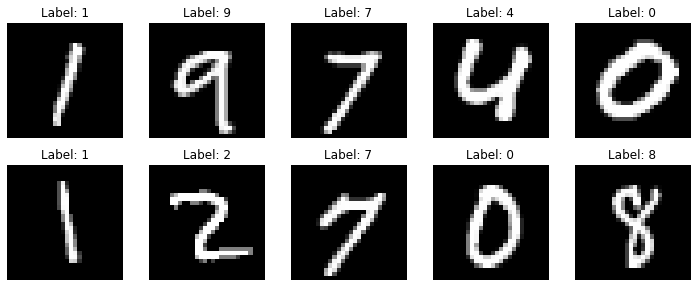

In [6]:

random_indices = np.random.choice(len(train), 10, replace=False)
print(random_indices)
# Set up a 5x5 grid for subplots
fig, axes = plt.subplots(5, 5, figsize=(10, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over random indices and display corresponding images
for i, idx in enumerate(random_indices):
    # Extract pixel data for the current row
    pixel_data = train.iloc[idx, 1:].values.astype(float)
    # Reshape pixel data into a square image (assuming images are square)
    image_size = int(np.sqrt(len(pixel_data)))
    image = pixel_data.reshape((image_size, image_size))
    # Display image
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f"Label: {train.iloc[idx]['label']}")
    axes[i].axis('off')

# Hide any remaining empty subplots
for i in range(10, 25):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


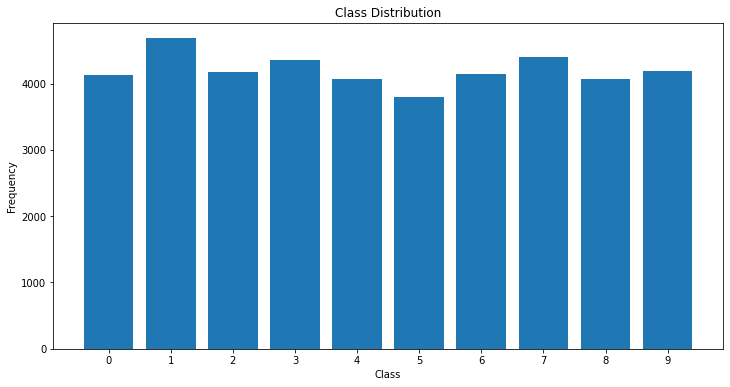

In [7]:
# Count occurrences of each class
class_counts = train['label'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.xticks(class_counts.index)  # Ensure all classes are labeled
plt.show()

## building the model

In [8]:
import keras
# from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint


In [9]:
scaler = MinMaxScaler()
train.iloc[:, 1:] = scaler.fit_transform(train.iloc[:, 1:])

X = train.iloc[:, 1:].values.reshape(-1, 28, 28, 1)

y = train['label']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:

print(X_train.shape, y_train.shape)

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
x_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# X_train /= 255
# X_test /= 255

print('X_train shape:', X_train.shape)
print('Y_train shape:',y_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


(33600, 28, 28, 1) (33600,)
X_train shape: (33600, 28, 28, 1)
Y_train shape: (33600, 10)
33600 train samples
8400 test samples


In [12]:

batch_size = 128
num_classes = 10
epochs = 30

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=input_shape)) #(128,28,28,1)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [13]:
checkpoint_callback = ModelCheckpoint(filepath='best_model.h5', 
                                      monitor='val_accuracy', 
                                      mode='max', 
                                      save_best_only=True)

In [14]:

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [15]:
hist = model.fit(X_train, y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test))

Epoch 1/30


263/263 [==============================] - 8s 29ms/step - loss: 0.4753 - accuracy: 0.8542 - val_loss: 0.1558 - val_accuracy: 0.9537
Epoch 2/30
263/263 [==============================] - 8s 29ms/step - loss: 0.1273 - accuracy: 0.9611 - val_loss: 0.1168 - val_accuracy: 0.9644
Epoch 3/30
263/263 [==============================] - 8s 29ms/step - loss: 0.0879 - accuracy: 0.9725 - val_loss: 0.0772 - val_accuracy: 0.9768
Epoch 4/30
263/263 [==============================] - 8s 29ms/step - loss: 0.0687 - accuracy: 0.9791 - val_loss: 0.0780 - val_accuracy: 0.9761
Epoch 5/30
263/263 [==============================] - 8s 29ms/step - loss: 0.0541 - accuracy: 0.9829 - val_loss: 0.0681 - val_accuracy: 0.9792
Epoch 6/30
263/263 [==============================] - 8s 29ms/step - loss: 0.0489 - accuracy: 0.9846 - val_loss: 0.0714 - val_accuracy: 0.9788
Epoch 7/30
263/263 [==============================] - 8s 30ms/step - loss: 0.0411 - accuracy: 0.9863 - val_loss: 0.0484 - val_accuracy: 0.9852
Epoch 8/30

In [30]:

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# model.save('mnist.h5')

Test loss: 0.04918932542204857
Test accuracy: 0.989047646522522


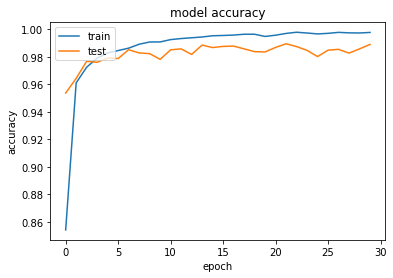

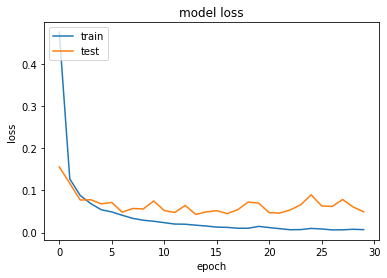

In [31]:
import matplotlib.pyplot as plt
import numpy as np


# summarize hist for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize hist for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [32]:
model.save('best_model.h5')


In [33]:
from tensorflow.keras.models import load_model

best_model = load_model('best_model.h5')

# submision prepare

In [34]:
test  = pd.read_csv("test.csv")
test


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
X = test.values.reshape(-1, 28, 28, 1)
X = X.astype('float32')/255

In [36]:
output = best_model.predict(X)

875/875 [==============================] - 3s 4ms/step


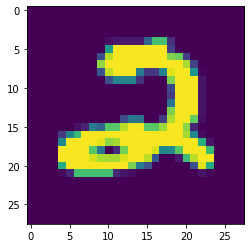

[1.8205271e-09 1.0483000e-13 1.0000000e+00 6.6934290e-16 8.4158585e-14
 2.8134696e-18 1.3240636e-13 1.3145589e-10 2.6389516e-13 9.7537167e-16]
2


In [37]:
plt.imshow(X[0])
plt.show()

print(output[0])
print(np.argmax(output[0]))

In [38]:
save_dict = {
    'ImageId': [],
    'Label': []
}

for i, out in enumerate(output):
    index = i + 1
    out = np.argmax(out)
    save_dict['ImageId'].append(index) 
    save_dict['Label'].append(out)

In [39]:
pd.DataFrame(save_dict).to_csv('submission.csv',index=False)